# What are the most demanded skills for the top 3 most popular data source?

In [1]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt 
from datasets import load_dataset
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() #It stores data as data sets, we converted it to dataframe

#Cleaning Data
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)
   

In [2]:
df_IN=df.loc[(df['job_country'] == 'India')]

In [3]:
df_skills=df_IN.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
16,Big Data Engineer,powershell
16,Big Data Engineer,python
16,Big Data Engineer,sql
16,Big Data Engineer,mysql
16,Big Data Engineer,sql server
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,None
785740,AWS System Analyst,aws


In [4]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [5]:
job_titles=list(df_skills_count['job_title_short'].unique())

In [6]:
job_titles=job_titles[:3]

In [7]:
job_titles

['Data Engineer', 'Data Scientist', 'Data Analyst']

In [8]:
job_titles.sort()

In [9]:
len(job_titles)

3

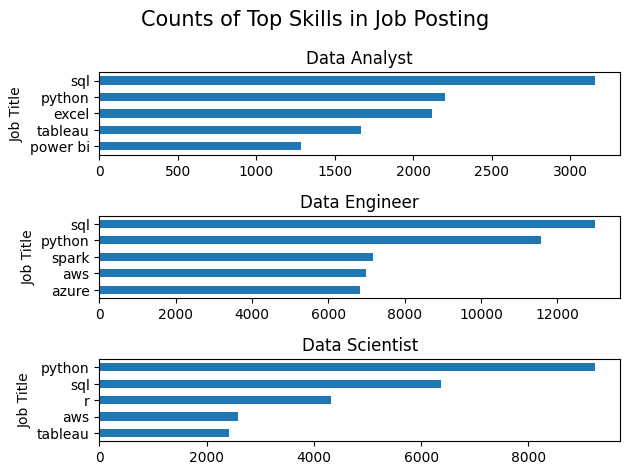

In [14]:
fig, ax = plt.subplots(len(job_titles), 1)
plt.tight_layout() 

for i,job_title in enumerate(job_titles):
    df_plot=df_skills_count.loc[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',title=job_title,legend=False,ax=ax[i])
    ax[i].invert_yaxis()
    ax[i].set_ylabel('Job Title')

fig.suptitle('Counts of Top Skills in Job Posting',fontsize=15)
plt.tight_layout() 
plt.show()


In [19]:
df_job_title_count=df_IN['job_title_short'].value_counts().reset_index(name='Total_Jobs')


In [38]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skills_perc['skill_percentage']=(df_skills_perc['skill_count']/df_skills_perc['Total_Jobs'])*100

In [41]:
df_skills_perc

,job_skills,job_title_short,skill_count,Total_Jobs,skill_percentage
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1560,chef,Senior Data Analyst,1,1083,0.092336
1561,seaborn,Cloud Engineer,1,351,0.284900
1562,db2,Cloud Engineer,1,351,0.284900
1563,db2,Machine Learning Engineer,1,671,0.149031


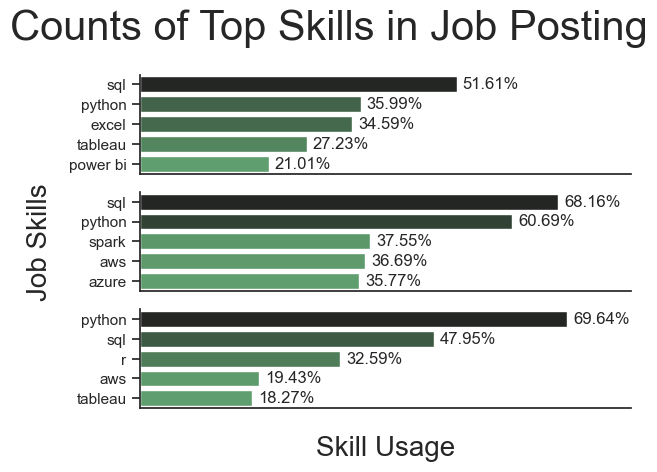

In [75]:
import seaborn as sns


fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i,job_title in enumerate(job_titles):
    df_plot=df_skills_perc.loc[df_skills_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,x='skill_percentage',y='job_skills',hue='skill_count',legend=False,ax=ax[i],palette='dark:g_r')
    ax[i].set_ylabel('Job Title')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,80)
    ax[i].set_xticks([])
    if i==len(job_titles)-2:
        ax[i].set_ylabel('Job Skills',fontsize=20,labelpad=20)
    if i==len(job_titles)-1:
        ax[i].set_xlabel('Skill Usage',fontsize=20,labelpad=20)
    for n,v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v+1,n,f'{round(v,2)}%',va='center')
sns.despine()   
fig.suptitle('Counts of Top Skills in Job Posting',fontsize=30)
plt.tight_layout() 
plt.show()
